In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 190MB/s]


In [ ]:
!unzip new-york-city-airbnb-open-data.zip

Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

first, we import data and have a overview over data and some general features.

In [ ]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.shape

(48895, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## 1: Data Cleaning

In [ ]:
## drop features that are somehow unnecessary 
data.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

fill Nan values

In [ ]:
data.fillna(data._get_numeric_data().mean(),inplace = True)
data.isna().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

normalizing continuous features and droping outliers

In [ ]:
'''for col in data.columns:
  print(col)
  if data[col].dtype == 'int64' or data[col].dtype == 'float64':
    if col == 'host_id':
      continue
    else:
      data[col] = ((data[col] - data[col].mean())/(data[col].std()))'''

host_id
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


In [ ]:
data.shape

(48895, 17)

In [ ]:
## drop outliers 
for col in data.columns:
  print(col)
  if  data[col].dtype == 'float64' or data[col].dtype == 'int64':
    if col == 'host_id':
      continue
    else:
      upper_range = data[col].mean() + 3 * data[col].std()
      lower_range = data[col].mean() - 3 * data[col].std()
      
      indexes = data[(data[col] > upper_range) | (data[col] < lower_range)].index
      data.drop(indexes, inplace=True)

host_id
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


In [ ]:
## as you can see here, we found approximately 4000 outliers in our data
data.shape

(44371, 17)

## 2: visualizing data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


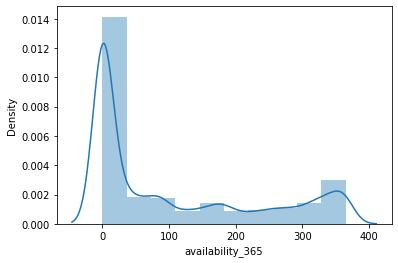

In [ ]:
sns.distplot(data['availability_365'], kde_kws={"label": 'availability_365'}, bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


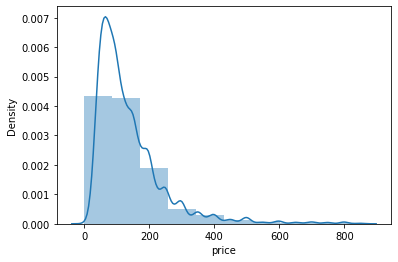

In [ ]:
sns.distplot(data['price'], kde_kws={"label": 'price'}, bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


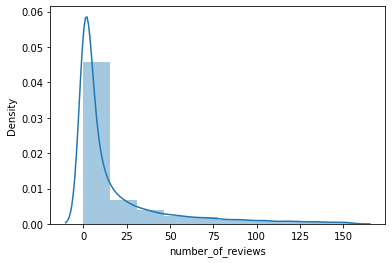

In [ ]:
sns.distplot(data['number_of_reviews'], kde_kws={"label": 'number_of_reviews'}, bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


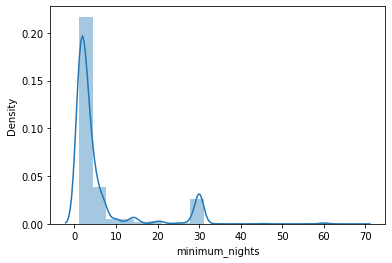

In [ ]:
sns.distplot(data['minimum_nights'], bins=20)

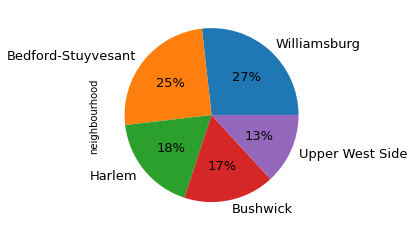

In [ ]:
data['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood Group')

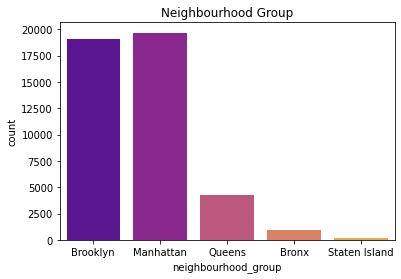

In [ ]:
sns.countplot(data['neighbourhood_group'], palette="plasma")
plt.title('Neighbourhood Group')

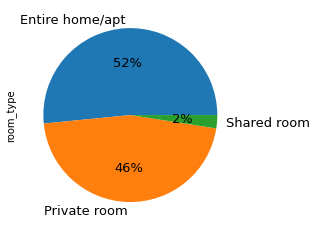

In [ ]:
data['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

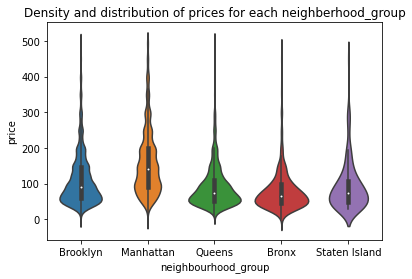

In [ ]:
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=data[data['price'] < 500], x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

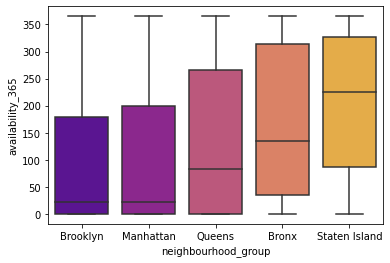

In [ ]:
sns.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='plasma')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


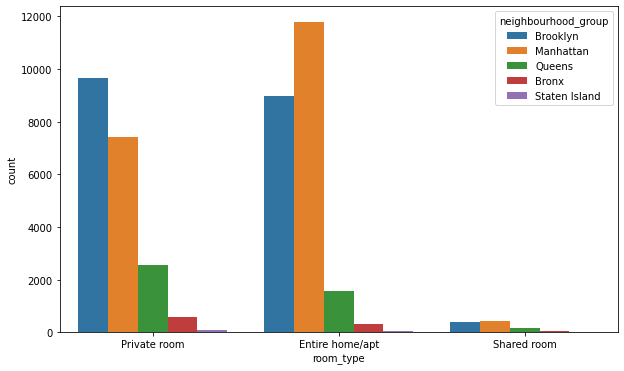

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['room_type'], hue=data['neighbourhood_group'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


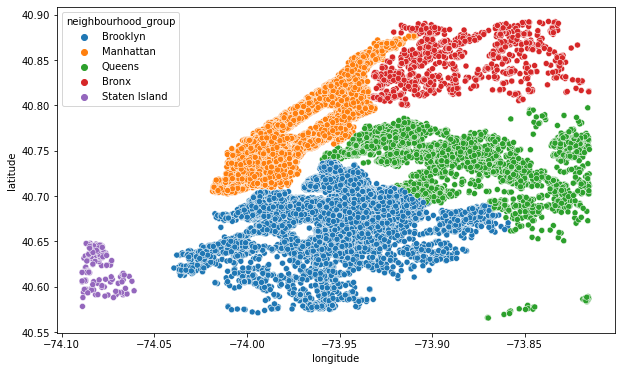

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['longitude'],data['latitude'], hue=data['neighbourhood_group'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


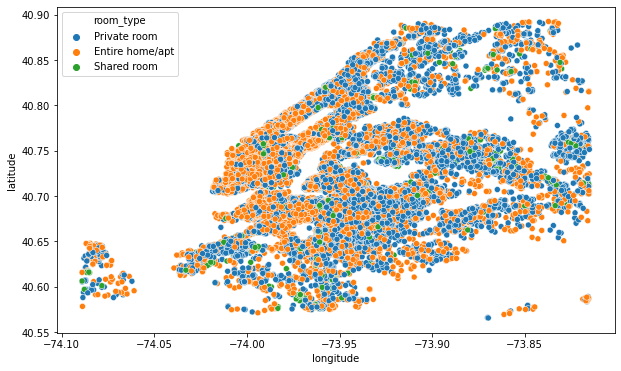

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['longitude'],data['latitude'], hue=data['room_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


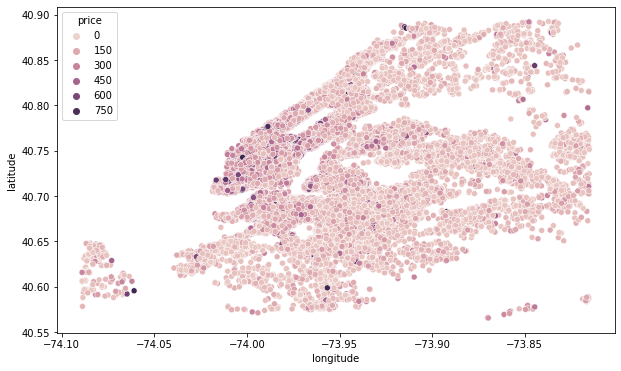

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['longitude'],data['latitude'],hue=data['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


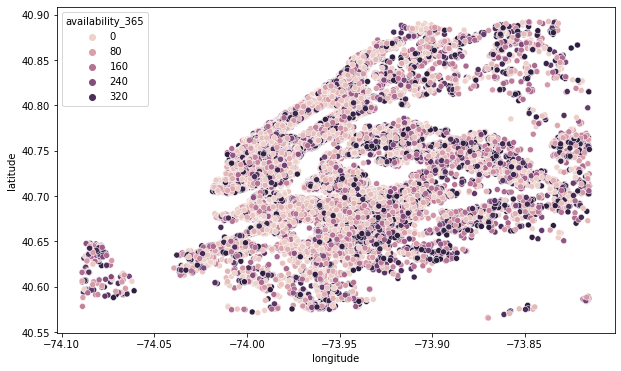

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['longitude'],data['latitude'],hue=data['availability_365'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


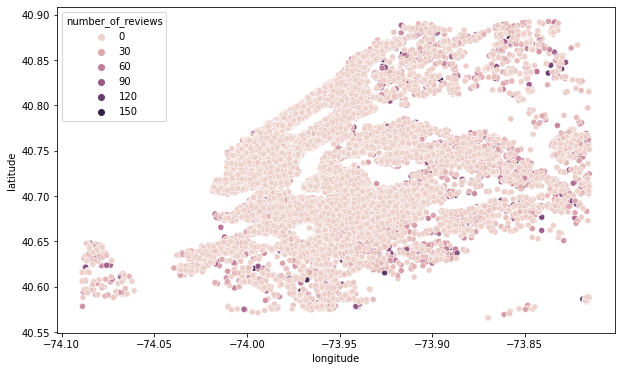

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['longitude'],data['latitude'],hue=data['number_of_reviews'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


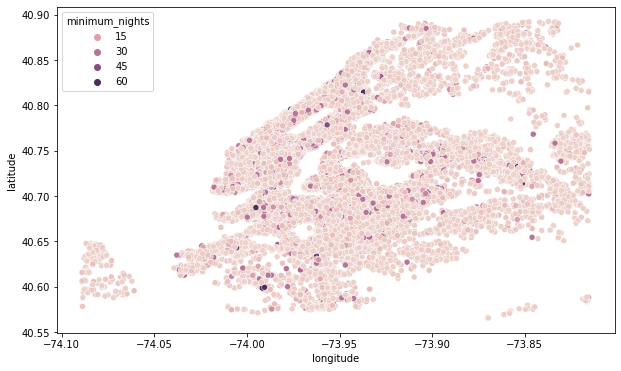

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['longitude'],data['latitude'],hue=data['minimum_nights'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


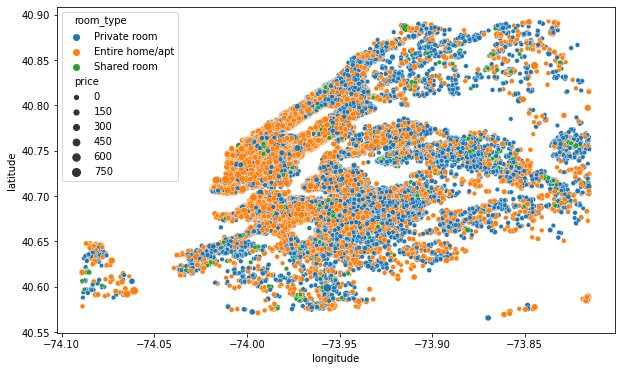

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['longitude'],data['latitude'], hue=data['room_type'], size=data['price'])

## 3: Find hosts with most number of houses

In [ ]:
def get_hosts_with_most_house(data, num=10):
  '''This function reads data from csv and prints hosts with most number of houses on dataset.'''
  data = pd.read_csv('AB_NYC_2019.csv')
  print('Here is the ids of hosts with the most number of houses : ')
  print(data.host_id.value_counts().head(num).to_string(index=True))
  return 

get_hosts_with_most_house(data)

Here is the ids of hosts with the most number of houses : 
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52


In [ ]:
data[data['host_id']==137358866]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_gender
32718,25779464,Lovely Room in the Heart of Manhattan,137358866,Kazuya,Manhattan,Harlem,40.81118,-73.94231,Private room,56,30,4,2019-04-06,0.37,103,244,NaN
32719,25779937,Simple & Convenient Manhattan Room,137358866,Kazuya,Manhattan,Harlem,40.81207,-73.94359,Private room,52,30,2,2019-01-31,0.18,103,184,NaN
32837,25868383,Awesome Central Park Room. Cozy Manhattan Space.,137358866,Kazuya,Manhattan,East Harlem,40.79322,-73.94038,Private room,34,30,3,2019-03-31,0.26,103,207,NaN
32846,25871304,Affordable Lenox Ave Room. Clean Sunny Comfy!,137358866,Kazuya,Manhattan,Harlem,40.81205,-73.94309,Private room,32,30,0,NaN,NaN,103,236,NaN
32872,25895519,Cozy Harlem room w/ a view! Near Central Park!,137358866,Kazuya,Manhattan,Harlem,40.81098,-73.94278,Private room,52,30,1,2018-07-31,0.09,103,237,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44623,34324284,Comfy room with WiFi. Mins to Central Park!,137358866,Kazuya,Manhattan,East Harlem,40.79395,-73.94153,Private room,38,30,0,NaN,NaN,103,0,NaN
44718,34370821,Spacious room 2mins from 52st-Woodside 7 train!,137358866,Kazuya,Queens,Woodside,40.74341,-73.91064,Private room,54,30,0,NaN,NaN,103,10,NaN
44773,34394888,Room w/ lots of Natural Light. Near 69st 7 train.,137358866,Kazuya,Queens,Woodside,40.74300,-73.89444,Private room,47,30,0,NaN,NaN,103,246,NaN
44776,34396674,Cozy sun-fillled Astoria RM near Broadway stat...,137358866,Kazuya,Queens,Astoria,40.76571,-73.92758,Private room,48,30,0,NaN,NaN,103,242,NaN


## 4: Find hosts with the most customer

In [ ]:
def find_hosts_with_most_reviews(data, num=10):
  result = data.groupby('host_id')['number_of_reviews'].sum().sort_values().tail(num)
  print('Here is the ids of hosts with the most number of houses : ')
  print(result.to_string(index=True))
  return pd.DataFrame(result).reset_index()

res = find_hosts_with_most_reviews(data)

Here is the ids of hosts with the most number of houses : 
host_id
23591164     1269
219517861    1281
6885157      1346
16677326     1355
4734398      1798
40176101     1818
35524316     1971
26432133     2017
344035       2205
37312959     2273


In [ ]:
for i in res['host_id']:
  temp = data[data['host_id']==i]
  if data[data['host_id']==i]['price'].mean() < data['price'].mean():
    print('ok')
  else:
    print(i)

ok
219517861
ok
ok
ok
ok
35524316
ok
ok
ok


In [ ]:
data[data['host_id']==219517861]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_gender
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309,NaN
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219,NaN
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159,NaN
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91,NaN
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339,NaN
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342,NaN
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347,NaN
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327,NaN


In [ ]:
data[data['host_id']==35524316]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_gender
8853,6786761,[202] 5 min WALK to Times Square!,35524316,Yasu & Akiko,Manhattan,Hell's Kitchen,40.76037,-73.99084,Private room,155,1,176,2019-06-19,3.57,11,248,NaN
8854,6787310,[205] 5 min WALK to Times Square,35524316,Yasu & Akiko,Manhattan,Hell's Kitchen,40.76044,-73.98903,Private room,210,1,182,2019-06-23,3.69,11,249,NaN
8861,6795568,[203] 5 min WALK to Times Square,35524316,Yasu & Akiko,Manhattan,Hell's Kitchen,40.76140,-73.98954,Private room,155,1,179,2019-06-20,3.66,11,243,NaN
8871,6799692,[206] 5 min WALK to Times Square,35524316,Yasu & Akiko,Manhattan,Hell's Kitchen,40.76180,-73.99093,Private room,255,1,192,2019-06-26,3.91,11,305,NaN
8872,6799814,[306] 5 min WALK to Times Square,35524316,Yasu & Akiko,Manhattan,Hell's Kitchen,40.76207,-73.98945,Private room,245,1,162,2019-06-30,3.29,11,1,NaN
8873,6799895,[301] 5 min WALK to Times Square,35524316,Yasu & Akiko,Manhattan,Hell's Kitchen,40.76146,-73.99109,Private room,155,1,201,2019-06-28,4.10,11,240,NaN
8874,6799932,[302] 5 min WALK to Times Square,35524316,Yasu & Akiko,Manhattan,Hell's Kitchen,40.76015,-73.99086,Private room,155,1,200,2019-06-16,4.07,11,240,NaN
8876,6799957,[303] 5 min WALK to Times Square,35524316,Yasu & Akiko,Manhattan,Hell's Kitchen,40.75987,-73.99056,Private room,155,1,203,2019-06-13,4.13,11,211,NaN
8877,6799999,[305] 5 min WALK to Times Square!,35524316,Yasu & Akiko,Manhattan,Hell's Kitchen,40.76036,-73.99073,Private room,165,1,153,2019-06-15,3.16,11,271,NaN
8878,6800277,[307] 5 min WALK to Times Square,35524316,Yasu & Akiko,Manhattan,Hell's Kitchen,40.76185,-73.99126,Private room,155,1,189,2019-06-23,3.86,11,245,NaN


In [ ]:
data[data['neighbourhood']=='Hell\'s Kitchen'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                                2.114741e+07
host_id                           9.159154e+07
latitude                          4.076216e+01
longitude                        -7.399148e+01
price                             2.047942e+02
minimum_nights                    8.167518e+00
number_of_reviews                 2.565220e+01
reviews_per_month                 1.839941e+00
calculated_host_listings_count    1.285444e+01
availability_365                  1.388468e+02
dtype: float64

In [ ]:
data[data['host_id']==6885157]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2482,6885157,Brooklyn,Bedford-Stuyvesant,40.68388,-73.95019,Private room,65,1,85,1.16,15,345
2488,6885157,Brooklyn,Bedford-Stuyvesant,40.68201,-73.95012,Private room,65,1,119,1.61,15,313
2494,6885157,Brooklyn,Bedford-Stuyvesant,40.68240,-73.95039,Private room,55,1,127,1.77,15,318
2513,6885157,Brooklyn,Bedford-Stuyvesant,40.68322,-73.95085,Private room,60,1,142,1.95,15,321
2545,6885157,Brooklyn,Bedford-Stuyvesant,40.68325,-73.94975,Private room,45,1,117,1.61,15,236
2574,6885157,Brooklyn,Bedford-Stuyvesant,40.68243,-73.95167,Private room,55,1,75,1.04,15,285
2797,6885157,Brooklyn,Bedford-Stuyvesant,40.68390,-73.95042,Private room,55,1,126,1.77,15,343
3057,6885157,Brooklyn,Bedford-Stuyvesant,40.68366,-73.95009,Private room,61,1,71,1.06,15,314
3327,6885157,Brooklyn,Bedford-Stuyvesant,40.68248,-73.95149,Private room,60,1,93,1.38,15,305
4274,6885157,Brooklyn,Bedford-Stuyvesant,40.68191,-73.95136,Private room,55,1,67,1.11,15,307


In [ ]:
res = data[data['host_id'].isin(res['host_id'])]

## 5: hypothesis tests

In [ ]:
from scipy import stats

### First test : average price is 120

In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_1samp(data['price'],popmean = 120.0)
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 1.5084594843008312 , p_value : 0.1314441277886503
accept null hypothesis


### Second test: neighbourhood_group of the house has no effect on its price

In [ ]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
Brooklyn = data[data['neighbourhood_group'] == 'Brooklyn']['price']
Manhattan = data[data['neighbourhood_group'] == 'Manhattan']['price']

In [ ]:
Brooklyn.var()

7970.216970778656

In [ ]:
Manhattan.var()

14871.300608927404

In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(Brooklyn, Manhattan)

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : -51.64028797994355 , p_value : 0.0
reject null hypothesis


###Third test: price and number of reviews are independant

In [ ]:
from scipy.stats import pearsonr
stat, p = pearsonr(data['price'], data['number_of_reviews'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.035, p=0.000
Probably dependent


### Fourth test: room type has no effect no price

In [ ]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
Private = data[data['room_type'] == 'Private room']['price']
Shared = data[data['room_type'] == 'Shared room']['price']

In [ ]:
Private.var()

3777.259155613751

In [ ]:
Shared.var()

5356.079213981752

In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(Private, Shared)

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 8.831374103611413 , p_value : 1.1120302902578336e-18
reject null hypothesis


### fifth test: neighbourhood group has no effect on number of reviews

In [ ]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
Brooklyn = data[data['neighbourhood_group'] == 'Brooklyn']['number_of_reviews']
Manhattan = data[data['neighbourhood_group'] == 'Manhattan']['number_of_reviews']
Queens = data[data['neighbourhood_group'] == 'Queens']['number_of_reviews']
Bronx = data[data['neighbourhood_group'] == 'Bronx']['number_of_reviews']
Staten = data[data['neighbourhood_group'] == 'Staten Island']['number_of_reviews']

In [ ]:
alpha = 0.05 
fstat,p_value = stats.f_oneway(Brooklyn, Manhattan, Queens, Bronx, Staten)

print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f stat : 29.369471749787028 , p_value : 1.9907763975580333e-24
reject null hypothesis


## 6: prediction

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


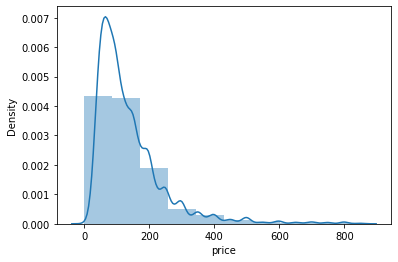

In [ ]:
sns.distplot(data['price'], kde_kws={"label": 'price'}, bins=10)

As you can see our price data is skewed so will apply a log transformation in order to improve that issue.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


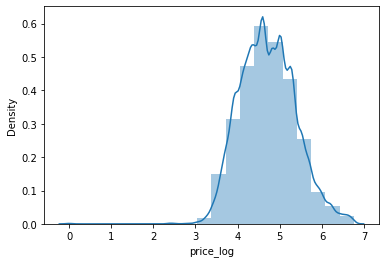

In [ ]:
data['price_log'] = np.log(data.price+1)
data.drop(['price'], axis=1, inplace=True)
sns.distplot(data['price_log'], kde_kws={"label": 'price'}, bins=20)

Text(0.5, 1.0, 'Correlation Matrix')

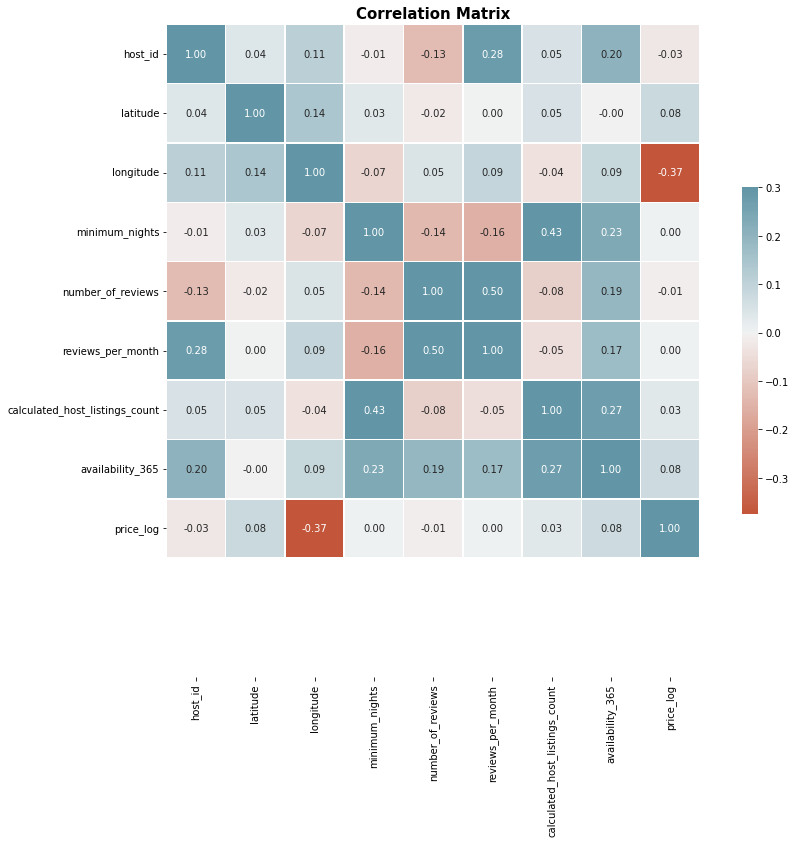

In [ ]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

### phase 1 prediction: no feature engineering

In [ ]:
data.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_log'],
      dtype='object')

In [ ]:
x = data.drop(['price_log'], axis=1)
y = data['price_log']
x = pd.get_dummies(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [ ]:
## train models and get the best hyper parameters

def linear_reg(input_x, input_y, cv=5):
  model_LR= LinearRegression()
  parameters = {'fit_intercept':[True,False]}
  grid_search_LR = GridSearchCV(estimator=model_LR,  
                        param_grid=parameters,
                        scoring='neg_mean_squared_error',
                        cv=cv,
                        n_jobs=-1)
  grid_search_LR.fit(input_x, input_y)
  best_parameters_LR = grid_search_LR.best_params_  
  best_score_LR = grid_search_LR.best_score_ 
  print(best_parameters_LR)
  print(best_score_LR)
  return 

def ridge_reg(input_x, input_y, cv=5):
  model_Ridge= Ridge()
  alphas = np.array([1,0.1,0.01,0.001,0.0001])
  normalizes= ([True,False])
  grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                        param_grid=(dict(alpha=alphas, normalize= normalizes)),
                        scoring='neg_mean_squared_error',
                        cv=cv,
                        n_jobs=-1)

  grid_search_Ridge.fit(input_x, input_y)
  best_parameters_Ridge = grid_search_Ridge.best_params_  
  best_score_Ridge = grid_search_Ridge.best_score_ 
  print(best_parameters_Ridge)
  print(best_score_Ridge)
  return 

def lasso_reg(input_x, input_y, cv=5):
  model_Lasso= Lasso()
  alphas = np.array([1,0.1,0.01,0.001,0.0001])
  normalizes= ([True,False])
  grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                        param_grid=(dict(alpha=alphas, normalize= normalizes)),
                        scoring='neg_mean_squared_error',
                        cv=cv,
                        n_jobs=-1)
  grid_search_lasso.fit(input_x, input_y)
  best_parameters_lasso = grid_search_lasso.best_params_  
  best_score_lasso = grid_search_lasso.best_score_ 
  print(best_parameters_lasso)
  print(best_score_lasso)
  return 

def gradient_boost_reg(input_x, input_y, cv=5):
  model_gradient= GradientBoostingRegressor()
  alphas = np.array([0.1])
  grid_search_gradient = GridSearchCV(estimator=model_gradient,  
                        param_grid=(dict(learning_rate=alphas)),
                        scoring='neg_mean_squared_error',
                        cv=cv,
                        n_jobs=-1)
  grid_search_gradient.fit(input_x, input_y)
  best_parameters_gradient = grid_search_gradient.best_params_  
  best_score_gradient = grid_search_gradient.best_score_ 
  print(best_parameters_gradient)
  print(best_score_gradient)
  return 


In [ ]:
linear_reg(x, y)

{'fit_intercept': True}
-0.18281726863211753


In [ ]:
ridge_reg(x, y)

{'alpha': 1.0, 'normalize': False}
-0.1827807401418567


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.51692e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
lasso_reg(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


{'alpha': 0.0001, 'normalize': False}
-0.18303801834160033


In [ ]:
gradient_boost_reg(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 275, in _check_params
    "learning_rate must be greater than 0 but was %r" % self.learning_rate
ValueError: learning_rate must

{'learning_rate': 0.1}
-0.17127400984956948


In [ ]:
  ## prepare predictions with best parameters

###Linear Regression
lr_x = LinearRegression()
lr_x.fit(x_train, y_train)
pred_lr= lr_x.predict(x_test)

###Ridge
ridge_x = Ridge(alpha = 1.0)
ridge_x.fit(x_train, y_train)           
pred_ridge = ridge_x.predict(x_test) 

###Lasso
Lasso_x = Lasso(alpha = 0.0001)
Lasso_x.fit(x_train, y_train)
pred_Lasso = Lasso_x.predict(x_test) 

##Gradient Boosting
model_gb = GradientBoostingRegressor(learning_rate=0.1)
model_gb.fit(x_train, y_train) 
pred_gb= model_gb.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.88967e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
print('-------------Lineer Regression-----------')

print('MAE: %f'% mean_absolute_error(y_test, pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_lr)))   
print('R2 %f' % r2_score(y_test, pred_lr))

print('---------------Ridge ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

print('---------------Lasso-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

print('---------------GradientBoosting-------------------')

print('MAE: %f' % mean_absolute_error(y_test,pred_gb)) 
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_gb)))
print('R2 %f' % r2_score(y_test, pred_gb))


-------------Lineer Regression-----------
MAE: 0.317925
RMSE: 0.427964
R2 0.574949
---------------Ridge ---------------------
MAE: 0.318259
RMSE: 0.428361
R2 0.574159
---------------Lasso-----------------------
MAE: 0.318879
RMSE: 0.429405
R2 0.572083
---------------GradientBoosting-------------------
MAE: 0.304264
RMSE: 0.412122
R2 0.605835


### phase 2 prediction: add feature engineering

First we use pca to improve our results

In [ ]:
data.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_log'],
      dtype='object')

In [ ]:
x = data.drop(['price_log'], axis=1)
y = data['price_log']
x = pd.get_dummies(x)
x.shape

(44129, 184)

In [ ]:
pca = PCA(n_components=50)
x_pca = pca.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [ ]:
lr_x = LinearRegression()
lr_x.fit(x_train, y_train)
pred_lr= lr_x.predict(x_test)

print('MAE: %f'% mean_absolute_error(y_test, pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_lr)))   
print('R2 %f' % r2_score(y_test, pred_lr))

MAE: 0.318363
RMSE: 0.429442
R2 0.571619


In the second method we use k best feature selection to see if it works or not

In [ ]:
x = data.drop(['price_log'], axis=1)
y = data['price_log']
x = pd.get_dummies(x)
x.shape

(44129, 184)

In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest

x_new = SelectKBest(f_regression, k=60).fit_transform(x, y)
print(x_new.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

(44129, 60)


In [ ]:
lr_x = LinearRegression()
lr_x.fit(x_train, y_train)
pred_lr= lr_x.predict(x_test)

print('MAE: %f'% mean_absolute_error(y_test, pred_lr))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_lr)))   
print('R2 %f' % r2_score(y_test, pred_lr))

MAE: 0.316325
RMSE: 0.424274
R2 0.584987


we see that both methods helped us in order to improve our model results.

In [ ]:
## final result 

x = data.drop(['price_log'], axis=1)
y = data['price_log']
x = pd.get_dummies(x)
x.shape

pca = PCA(n_components=50)
x_pca = pca.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

model_gb = GradientBoostingRegressor(learning_rate=0.1)
model_gb.fit(x_train, y_train) 
pred_gb= model_gb.predict(x_test)

print('MAE: %f' % mean_absolute_error(y_test,pred_gb)) 
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_gb)))
print('R2 %f' % r2_score(y_test, pred_gb))

MAE: 0.301022
RMSE: 0.405172
R2 0.613936


## extra question 2
## Checking if gender has an effect on price or number of reviews

In [ ]:
!pip install gender-guesser

     |████████████████████████████████| 379 kB 7.6 MB/s 


In [ ]:
import gender_guesser.detector as gender
d = gender.Detector()
print(d.get_gender(u"Bob"))

male


In [ ]:
data = pd.read_csv('AB_NYC_2019.csv')
data['host_gender'] = data['host_name'].apply(d.get_gender)
data['host_gender'] = data['host_gender'].map({'mostly_female': 'female', 'mostly_male': 'male'})
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_gender
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,NaN
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,NaN
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,NaN


In [ ]:
print("total price for males : " + str(data[data['host_gender']=='male']['price'].sum()))
print("total price for females : " + str(data[data['host_gender']=='female']['price'].sum()))

print("")
print("total number of reviews for males : " + str(data[data['host_gender']=='male']['number_of_reviews'].sum()))
print("total number of reviews for females : " + str(data[data['host_gender']=='female']['number_of_reviews'].sum()))

total price for males : 212648
total price for females : 235569

total number of reviews for males : 32209
total number of reviews for females : 30863


In [ ]:
male = data[data['host_gender']=='male']
female = data[data['host_gender']=='female']

Text(0.5, 1.0, 'Density and distribution of prices for each gender')

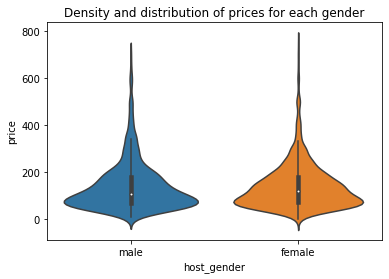

In [ ]:
viz_2=sns.violinplot(data=data[data['price'] < 750], x='host_gender', y='price')
viz_2.set_title('Density and distribution of prices for each gender')

### gender has no effect on house price

In [ ]:
print(male.price.var())
print(female.price.var())

27904.87463925759
89289.80056051504


In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(male.price,female.price)

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : -0.31212262171111793 , p_value : 0.7549699378626499
accept null hypothesis


In [ ]:
alpha = 0.05 
fstat,p_value = stats.f_oneway(male['price'] ,female['price'])

print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f stat : 0.09742053098382113 , p_value : 0.7549699378628124
accept null hypothesis


Text(0.5, 1.0, 'Density and distribution of number_of_reviews for each gender')

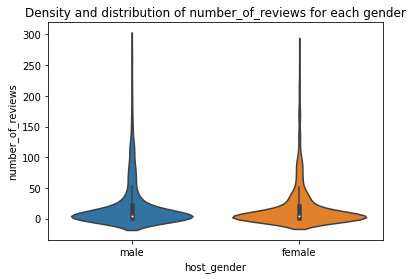

In [ ]:
viz_2=sns.violinplot(data=data[data['number_of_reviews'] < 300], x='host_gender', y='number_of_reviews')
viz_2.set_title('Density and distribution of number_of_reviews for each gender')

### gender has no effect on house number of reviews

In [ ]:
print(male['number_of_reviews'].var())
print(female['number_of_reviews'].var())

1952.8162494351218
1732.7276997557312


In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(male['number_of_reviews'],female['number_of_reviews'])

print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 1.7375457936113907 , p_value : 0.08239781310098132
accept null hypothesis


In [ ]:
alpha = 0.05 
fstat,p_value = stats.f_oneway(male['number_of_reviews'] ,female['number_of_reviews'])

print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f stat : 3.0190653848966416 , p_value : 0.0823978131008783
accept null hypothesis
